In [13]:
import scipy.misc
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.ndimage import zoom

Found 4 faces!


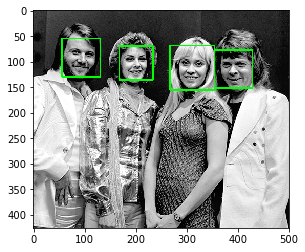

In [6]:
I = scipy.misc.imread('abba.png')
cascPath = "haarcascade_frontalface_default.xml"

# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

faces = faceCascade.detectMultiScale(
    I,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
    #flags = cv2.CV_HAAR_SCALE_IMAGE
)

print("Found {0} faces!".format(len(faces)))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(I, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(I,cmap='Greys_r')
plt.show()

In [7]:
faces

array([[168,  70,  66,  66],
       [ 56,  55,  75,  75],
       [267,  69,  87,  87],
       [354,  78,  74,  74]], dtype=int32)

In [28]:
## read the dataset
full_face = []
full_labels = []
all_images = os.listdir('yalefaces')
for j in range(1,11):    # there are 15 different people in the dataset
    img_list = [filename for filename in all_images if filename.startswith('subject%.2d'%j)]
#     img_list = glob.glob('yalefaces/subject%.2d*'%j)
    face1 = np.zeros((len(img_list),64,64))
    for k,img in enumerate(img_list):
        I = scipy.misc.imread(os.path.join('yalefaces',img))
        I = cv2.fastNlMeansDenoising(I, None, 9, 13)
        I = cv2.GaussianBlur(I, (5,5), 0)
        I = cv2.equalizeHist(I)
        faces = faceCascade.detectMultiScale(
            I,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30))
        x,y,h,w = faces[0]
        face1[k,...] = zoom(I[y:y+h,x:x+w],[64./h,64./w])
        
    labels = (j-1)*np.ones((11,))
    full_face.append(face1)
    full_labels.append(labels)
full_face = np.stack(full_face)    # contains the images of all faces
full_labels = np.stack(full_labels)   # contains the ID of all the faces

C:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [29]:
full_face.shape

(10, 11, 64, 64)

In [30]:
full_face

array([[[[ 98.,  61.,  52., ...,  25.,  27.,  37.],
         [ 91.,  51.,  48., ...,  24.,  26.,  33.],
         [ 81.,  47.,  40., ...,  22.,  23.,  28.],
         ...,
         [255., 255., 255., ..., 127., 127., 127.],
         [255., 255., 255., ..., 127., 127., 127.],
         [255., 255., 255., ..., 127., 127., 127.]],

        [[ 98.,  61.,  52., ...,  25.,  27.,  37.],
         [ 91.,  51.,  48., ...,  24.,  26.,  33.],
         [ 81.,  47.,  40., ...,  22.,  23.,  28.],
         ...,
         [255., 255., 255., ..., 127., 127., 127.],
         [255., 255., 255., ..., 127., 127., 127.],
         [255., 255., 255., ..., 127., 127., 127.]],

        [[ 61.,  49.,  38., ...,  24.,  27.,  33.],
         [ 55.,  43.,  36., ...,  23.,  23.,  29.],
         [ 46.,  39.,  35., ...,  22.,  22.,  26.],
         ...,
         [255., 255., 255., ..., 129., 129., 136.],
         [255., 255., 255., ..., 129., 129., 137.],
         [255., 255., 255., ..., 129., 129., 129.]],

        ...,

  

In [31]:
full_face = full_face/255 #normalise data

In [32]:
full_face

array([[[[0.38431373, 0.23921569, 0.20392157, ..., 0.09803922,
          0.10588235, 0.14509804],
         [0.35686275, 0.2       , 0.18823529, ..., 0.09411765,
          0.10196078, 0.12941176],
         [0.31764706, 0.18431373, 0.15686275, ..., 0.08627451,
          0.09019608, 0.10980392],
         ...,
         [1.        , 1.        , 1.        , ..., 0.49803922,
          0.49803922, 0.49803922],
         [1.        , 1.        , 1.        , ..., 0.49803922,
          0.49803922, 0.49803922],
         [1.        , 1.        , 1.        , ..., 0.49803922,
          0.49803922, 0.49803922]],

        [[0.38431373, 0.23921569, 0.20392157, ..., 0.09803922,
          0.10588235, 0.14509804],
         [0.35686275, 0.2       , 0.18823529, ..., 0.09411765,
          0.10196078, 0.12941176],
         [0.31764706, 0.18431373, 0.15686275, ..., 0.08627451,
          0.09019608, 0.10980392],
         ...,
         [1.        , 1.        , 1.        , ..., 0.49803922,
          0.49803922, 0.4

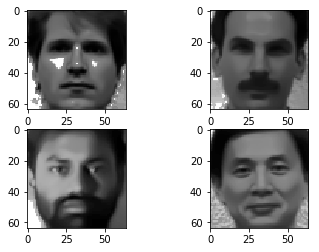

In [33]:
## visualize few faces from the dataset
I1 = full_face[0,5,...]
I2 = full_face[1,4,...]
I3 = full_face[6,3,...]
I4 = full_face[5,7,...]
plt.subplot(221)
plt.imshow(I1,cmap='Greys_r')

plt.subplot(222)
plt.imshow(I2,cmap='Greys_r')

plt.subplot(223)
plt.imshow(I3,cmap='Greys_r')

plt.subplot(224)
plt.imshow(I4,cmap='Greys_r')

plt.show()